In [2]:
import csv
import numpy as np
import pandas as pd

In [12]:
#df3 基因总表
df3 = pd.read_csv("v4/tmp03.csv",header=None)
#dfw 用于提取songbids中的wgenes
dfw = pd.read_csv("w2.gene.csv",header=0)



NameError: name 'head' is not defined

In [4]:
#大写化
df3[5]=df3[5].str.upper()
dfw['gene']=dfw['gene'].str.upper()
df3

,0,1,2,3,4,5,6
0,B10K-CU-031-01,Otidiformes,Ardeotis kori,ARDKOR_R08462,ENSGALP00000023165-D2,HNRNPKL,ENSGALP00000023165
1,B10K-CU-031-01,Otidiformes,Ardeotis kori,ARDKOR_R08461,ENSGALP00000020520-D1,UBQLN1,ENSGALP00000020520
2,B10K-CU-031-01,Otidiformes,Ardeotis kori,ARDKOR_R04240,ENSGALP00000024227-D2,UHRF2,ENSGALP00000024227
3,B10K-CU-031-01,Otidiformes,Ardeotis kori,ARDKOR_R05709,ENSGALP00000023277-D1,KCMF1,ENSGALP00000023277
4,B10K-CU-031-01,Otidiformes,Ardeotis kori,ARDKOR_R03894,ENSTGUP00000014662-D1,CD47,ENSTGUP00000014662
...,...,...,...,...,...,...,...
4917,ANS-002,Anseriformes,Anas platyrhynchos,NaN,NaN,HINT1,NaN
4918,ANS-002,Anseriformes,Anas platyrhynchos,NaN,NaN,SPIN,NaN
4919,ANS-002,Anseriformes,Anas platyrhynchos,NaN,NaN,KCMF1,NaN
4920,ANS-002,Anseriformes,Anas platyrhynchos,NaN,NaN,RFX3,NaN


In [5]:
#就是说没有加上去的songbirds
df_clean=df3.dropna(axis=0,how='any')
k = list(np.unique(df_clean[5]))

In [6]:
k=dfw['gene']

In [100]:
k0=np.unique(k)

In [101]:
#统计x基因在多少中物种中出现，改df[?]
def countXs(df, x):
    X=str.upper(x)
    dft=df.loc[df[5]==X]
    count=len(np.unique(dft[0]))
    return count

In [73]:
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count

In [102]:
number = []
for i in k0:
    number.append(countXs(df3,i))

In [103]:
D1={'gname':k0,'count':number}


In [76]:
#下面画songbirds_W_genes
dft=pd.DataFrame(D1)
x=dft['gname']
y=dft['count']

In [77]:
#fig = plt.figure(figsize=(15,4)) 
plt.rcParams['figure.figsize'] = (20, 5.0)
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.xticks(rotation=60)
plt.bar(x,y)
plt.title('songbirds_W_genes_count')
plt.savefig('songbirdsW.png')
plt.show()

In [13]:
#下面画基因分布频率
dft=pd.DataFrame(D1)
dft.loc[dft['count'] >=50 ]

NameError: name 'D1' is not defined

In [105]:
number0 = np.unique(number)
number0 = np.sort(number0)

In [89]:
numberc = []
for i in number0:
    numberc.append(countX(number,i))

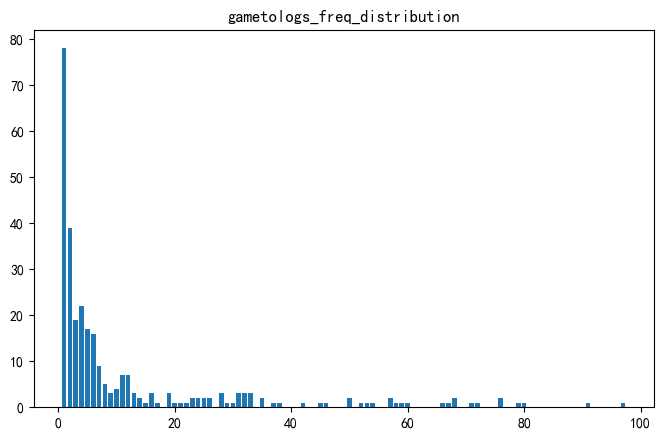

In [91]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 5.0)
plt.bar(number0, numberc)
plt.title('gametologs_freq_distribution')
plt.savefig('gametologs_freq_distribution.png')
plt.show()


In [114]:
#直接根据结果画散点
dfg=pd.read_csv("v4/153perc.csv",header=None)
dfg
dictog = {}
for i in order:
    dictog.update({i:[]})
    t = dfg.loc[dfg[4] == i]
    for k,row in t.iterrows():
        dictog[i].append(dfg.loc[k,3])

,0,1,2,3,4,5
0,B10K-CU-031-10,21,14,0.66,Caprimulgiformes,Nyctibius bracteatus
1,B10K-DU-001-04,16,13,0.81,Piciformes,Eubucco bourcierii
2,B10K-DU-001-07,14,11,0.78,Strigiformes,Ciccaba nigrolineata
3,B10K-DU-001-15,14,14,1.00,Passeriformes,Alaudala cheleensis
4,B10K-DU-001-16,14,8,0.57,Piciformes,Bucco capensis
...,...,...,...,...,...,...
148,OUT-0039,49,43,0.87,Passeriformes,Certhia familiaris
149,OUT-0048,32,29,0.90,Passeriformes,Vidua chalybeata
150,OUT-0049,55,36,0.65,Passeriformes,Molothrus ater
151,OUT-0061,19,17,0.89,Passeriformes,Copsychus sechellarum


In [115]:
#分order画boxplot
order = ["x1","Passeriformes","x3","Psittaciformes","Falconiformes","Cariamiformes","Coraciiformes","Piciformes","Bucerotiformes","Trogoniformes","Leptosomiformes","Coliiformes","Strigiformes","Accipitriformes","Acc2","Pelecan1","Pelecaniformes","Pelecan3","Pelecan4","Procellariiformes","Sphenisciformes","Gaviiformes","Phaethontiformes","Eurypygiformes","Charadriiformes","Gruiformes","Opisthocomiformes","Caprimulgi1","Caprimulgiformes","Cap3","Otidiformes","Musophagiformes","Cuculiformes","Mesitornithiformes","Pterocliformes","Columbiformes","Phoenicopteriformes","Podicipediformes","Galliformes","Anseriformes","Tinamiformes","Struthioniformes"]
order.reverse()

In [109]:
dicto0 = {}
for i in order:
    dicto0.update({i:[]})
    t = df3.loc[df3[1] == i]
    spe = np.unique(t[2])
    for j in spe:
        t2 = df3.loc[df3[2] == j]
        dicto0[i].append(len(np.unique(t2[5])))
x1=[]
y1=[]
for i in dictog.keys():
    for k in range(0,len(dictog[i])):
        x1.append(i)
    y1=y1+dictog[i]
    if len(dictog[i]) == 0 :
        x1.append(i)
        y1=y1+[0] 
x=[]
y=[]
for i in dicto0.keys():
    for k in range(0,len(dicto0[i])):
        x.append(i)
    y=y+dicto0[i]
    


In [94]:
import matplotlib.pyplot as plt

from pylab import *

rcParams['axes.unicode_minus'] = False

rcParams['font.sans-serif'] = ['Simhei']

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 15))
plt.scatter(y1, x1, alpha=0.5,label="gametologs_perc")
plt.legend()
plt.grid() 
plt.savefig("gametoplot.png")
plt.show()

<ipython-input-43-7c9eefca66b0>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nps = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in dicto.items()]))


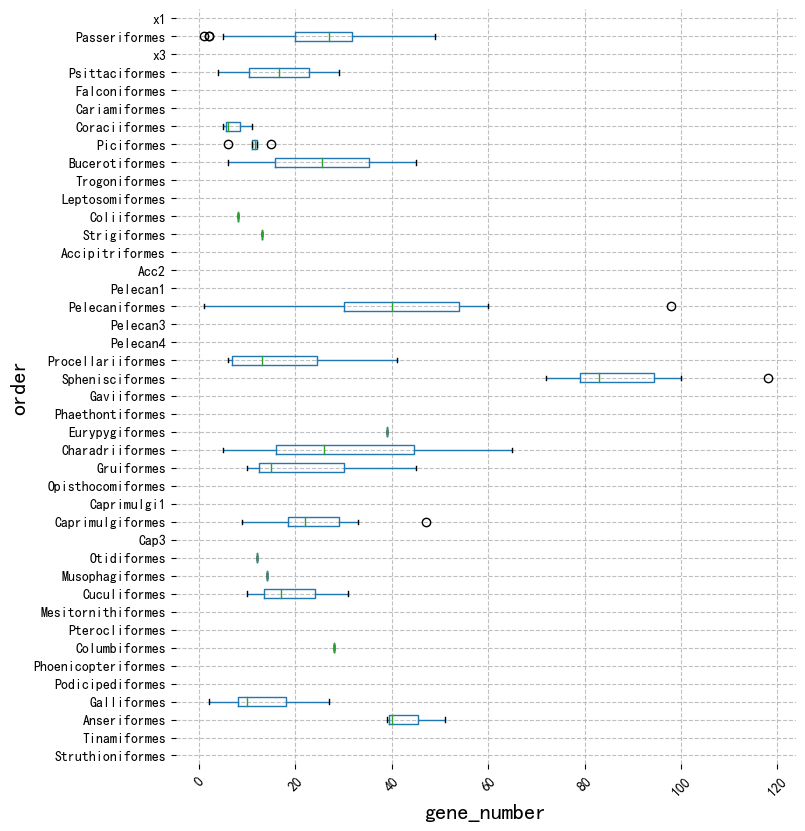

In [43]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
nps = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in dicto.items()]))
nps.plot.box(vert=False)
plt.xlabel("gene_number",fontsize=16)
plt.ylabel('order',fontsize=16) 
plt.grid(linestyle="--", alpha=0.8)
#plt.scatter(x,y)
#print(nps.describe())#显示中位数、上下四分位数、标准偏差等内容
plt.xticks(rotation=45)
#plt.tight_layout()


plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.savefig("boxplot.png")
plt.show()

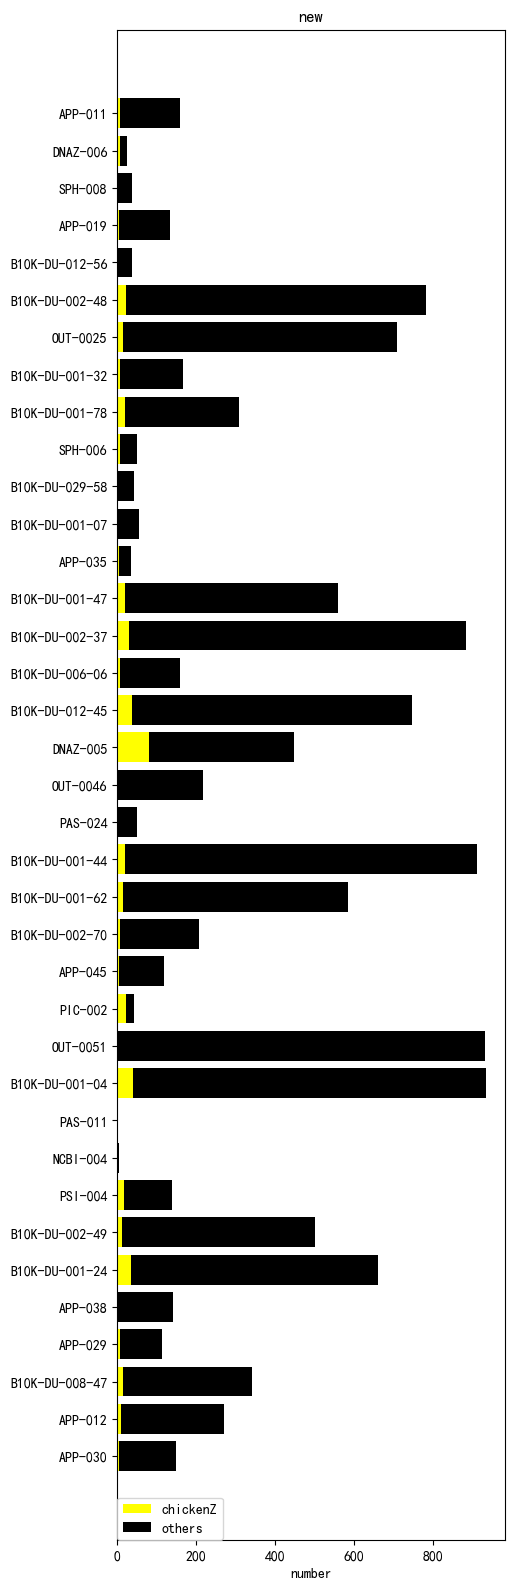

In [187]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 20.0)
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率

plt.barh(new, Z8, color='yellow', label='chickenZ')
plt.barh(new, nbz8, left=Z8, color='black', label='others')

plt.title("new")                                                        #图片标题
plt.xlabel("number")                                                              #x轴标题
plt.legend(loc=[0, 0])                                                             #图例的显示位置设置
plt.savefig("new.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()


In [166]:
c7x=np.repeat("previous-Wscaffolds",120)
c8x=np.repeat("new-Wscaffolds",len(c8))
n7x=np.repeat("previous-Wcds",len(n7))
n8x=np.repeat("new-Wcds",len(n8))
#x=list(c7x)+list(c8x)
x=list(n7x)+list(n8x)
#y=list(c7)+list(c8)
y=list(n7)+list(n8)
len(n7)

120

In [129]:
print(order)

['Struthioniformes', 'Tinamiformes', 'Anseriformes', 'Galliformes', 'Podicipediformes', 'Phoenicopteriformes', 'Columbiformes', 'Pterocliformes', 'Mesitornithiformes', 'Cuculiformes', 'Musophagiformes', 'Otidiformes', 'Cap3', 'Caprimulgiformes', 'Caprimulgi1', 'Opisthocomiformes', 'Gruiformes', 'Charadriiformes', 'Eurypygiformes', 'Phaethontiformes', 'Gaviiformes', 'Sphenisciformes', 'Procellariiformes', 'Pelecan4', 'Pelecan3', 'Pelecaniformes', 'Pelecan1', 'Acc2', 'Accipitriformes', 'Strigiformes', 'Coliiformes', 'Leptosomiformes', 'Trogoniformes', 'Bucerotiformes', 'Piciformes', 'Coraciiformes', 'Cariamiformes', 'Falconiformes', 'Psittaciformes', 'x3', 'Passeriformes', 'x1']


从人类那边补充一下基因名字

In [2]:
ori = pd.read_csv("gene_dn_gname1.csv",header = 0,index_col =0)
namel = pd.read_csv("human_genename.csv",header = 0,index_col = 0)
namel2 = pd.read_csv("gname_chi+hum.csv",header = None,index_col = 0)

In [4]:
df = ori.copy()
for k,row in ori.iterrows():
    c=row['ensembl_ID']
    c=c.split('-')
    rn = c[0]
    df.loc[k,'ensembl_ID'] = rn
    if row['gene_name'] == 'unknown':
        try:
            nrn = namel.loc[rn,'gene_name']
        except:
            try:
                nrn = namel2.loc[rn,1]
            except:
                continue
            else:
                df.loc[k,'gene_name'] = nrn
        else:
            df.loc[k,'gene_name'] = nrn
        


Venn图

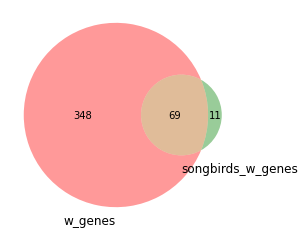

In [9]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
venn2([set(k), set(kw)],set_labels = ('w_genes', 'songbirds_w_genes'))
plt.savefig("venn.png")
plt.show()

In [6]:
hub =  pd.read_csv("blast_chicken_ori.csv",header = 0)
chi = pd.read_csv("blast_human_ori.csv",header = 0)

In [7]:
hub

,qseqid,sseqid,pident,length,qcovs,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,GENE_100030_nonREF,lcl|NC_052545.1_mrna_XM_414935.7_52287,42.857,49,30,27,1,1,49,323,466,8.000000e-03,38.9
1,GENE_100056_nonREF,lcl|NC_052569.1_mrna_XM_040655094.1_71457,77.612,67,65,15,0,132,198,1152,1352,1.140000e-24,103.0
2,GENE_100056_nonREF,lcl|NC_052569.1_mrna_XM_040655094.1_71457,44.444,72,65,29,3,17,87,393,578,3.180000e-05,47.0
3,GENE_100056_nonREF,lcl|NC_052569.1_mrna_XM_040655094.1_71457,43.662,71,65,34,1,17,87,468,662,7.240000e-04,42.7
4,GENE_100056_nonREF,lcl|NW_024095996.1_mrna_XM_040657039.1_75751,31.646,79,35,49,2,6,79,1154,918,8.400000e+00,30.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
941182,GENE_9999_REF,lcl|NC_052539.1_mrna_XM_040704725.1_40164,100.000,22,95,0,0,1,22,73,138,3.160000e-05,48.5
941183,GENE_9999_REF,lcl|NC_052539.1_mrna_XM_040704724.1_40162,87.629,291,99,16,1,38,308,230,1102,8.980000e-170,486.0
941184,GENE_9999_REF,lcl|NC_052539.1_mrna_XM_040704724.1_40162,100.000,22,99,0,0,1,22,73,138,6.400000e-09,48.5
941185,GENE_9999_REF,lcl|NC_052539.1_mrna_XM_040704724.1_40162,93.333,15,99,1,0,22,36,213,257,6.400000e-09,33.1


In [17]:
hub_f1 = hub.loc[hub['qcovs']>50]
chi_f1 = chi.loc[chi['qcovs']>50]

In [18]:
hub_f2 = hub_f1.loc[hub['pident']>40]
chi_f2 = chi_f1.loc[chi['pident']>40]

In [23]:
hub_s = hub_f2.sort_values(by=['qseqid','bitscore'], ascending=False )
chi_s = chi_f2.sort_values(by=['qseqid','bitscore'], ascending=False )

In [26]:
hub_clean = hub_s.groupby('qseqid').first()
chi_clean = chi_s.groupby('qseqid').first()

In [42]:
ori_toaj = ori.copy()
ori_toaj['blast_human']='null'
ori_toaj['blast_chicken']='null'

In [28]:
hub_clean

,sseqid,pident,length,qcovs,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
qseqid,,,,,,,,,,,,
GENE_100056_nonREF,lcl|NC_052569.1_mrna_XM_040655094.1_71457,77.612,67,65,15,0,132,198,1152,1352,1.140000e-24,103.0
GENE_10005_REF,lcl|NC_052539.1_mrna_XM_040704563.1_40064,91.930,917,99,68,2,14,927,2710,5451,0.000000e+00,1530.0
GENE_10024_REF,lcl|NC_052539.1_mrna_NM_001044662.1_39747,98.905,274,100,3,0,1,274,302,1123,0.000000e+00,529.0
GENE_10035_REF,lcl|NC_052539.1_mrna_NM_001277506.1_39683,97.590,332,100,8,0,1,332,56,1051,0.000000e+00,649.0
GENE_10043_REF,lcl|NC_052539.1_mrna_XM_040704946.1_40389,99.472,379,100,2,0,1,379,704,1840,0.000000e+00,743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
GENE_9973_REF,lcl|NC_052540.1_mrna_XM_015291681.3_43905,97.727,396,100,9,0,1,396,252,1439,0.000000e+00,712.0
GENE_9989_REF,lcl|NC_052540.1_mrna_XM_001234068.6_44151,95.939,197,97,8,0,1,197,800,1390,9.500000e-108,328.0
GENE_9991_REF,lcl|NC_052539.1_mrna_XM_025153216.2_40338,87.589,838,100,103,1,1,837,72,2585,0.000000e+00,1412.0


In [45]:
for k,row in ori.iterrows():
    eid = row['ensembl_ID']
    try:
        human_c = hub_clean.loc[eid,'sseqid']
    except KeyError:
        continue
    else:
        ori_toaj.loc[k,'blast_human']=human_c

In [49]:
for k,row in ori.iterrows():
    eid = row['ensembl_ID']
    try:
        chi_c = chi_clean.loc[eid,'sseqid']
    except KeyError:
        continue
    else:
        ori_toaj.loc[k,'blast_chicken']=chi_c

In [52]:
ori_next = ori_toaj.loc[(ori_toaj['blast_human']!='null') |(ori_toaj['blast_chicken']!='null')]

In [54]:
ori_next.to_csv('qc500_id40_mi.csv')

In [2]:
dd = pd.read_csv('qc500_id40_mi.csv')

In [3]:
dd

,Unnamed: 0,order,Latin_name,scaffold_ID,gene_ID,ensembl_ID,gene_name,blast_human,blast_chicken
0,5,Otidiformes,Ardeotis kori,scaffold_2989,ARDKOR_R15238,GENE_296877_nonREF,RECQL4,NaN,lcl|NC_000007.14_ncrna_XR_001744988.1_68182
1,6,Otidiformes,Ardeotis kori,scaffold_3043,ARDKOR_R15071,GENE_296524_nonREF,CMSS1,lcl|NC_052541.1_mrna_NM_204632.1_44315,NaN
2,7,Otidiformes,Ardeotis kori,scaffold_3043,ARDKOR_R15072,GENE_375396_nonREF,PCDHGA4,lcl|NC_052541.1_mrna_NM_204632.1_44315,NaN
3,13,Otidiformes,Ardeotis kori,scaffold_3337,ARDKOR_R15407,GENE_219633_nonREF,RNF31,lcl|NC_052541.1_mrna_NM_204632.1_44315,lcl|NC_000007.14_mrna_NM_001007253.4_64389
4,18,Otidiformes,Ardeotis kori,scaffold_3466,ARDKOR_R14809,GENE_367064_nonREF,OPN3,lcl|NC_052541.1_mrna_NM_204632.1_44315,lcl|NC_000008.11_mrna_XM_006716410.3_70173
...,...,...,...,...,...,...,...,...,...
1759,6056,Passeriformes,Copsychus sechellarum,scaffold_420,COPSEC_R15850,GENE_192701_nonREF,LOC117779438,lcl|NC_052532.1_ncrna_XR_001470174.3_5842,NaN
1760,6062,Passeriformes,Copsychus sechellarum,scaffold_556,COPSEC_R15573,GENE_418003_nonREF,RIMKLB,lcl|NC_052532.1_mrna_XM_040648311.1_4275,lcl|NC_000007.14_ncrna_XR_927142.2_62933
1761,6063,Passeriformes,Copsychus sechellarum,scaffold_556,COPSEC_R15772,GENE_403790_nonREF,LOC254028,lcl|NC_052532.1_ncrna_XR_001470174.3_5842,lcl|NC_000019.10_mrna_NM_001191055.2_148927
1762,6065,Passeriformes,Copsychus sechellarum,scaffold_572,COPSEC_R16280,GENE_418003_nonREF,RIMKLB,lcl|NC_052532.1_mrna_XM_040648311.1_4275,lcl|NC_000007.14_ncrna_XR_927142.2_62933


In [ ]:
dd1= dd.loc[dd['blast_chicken']]

In [14]:
nl2 = pd.read_csv("blast_chicken_ori.csv")

In [18]:
nl2

,qseqid,sseqid,pident,length,qcovs,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,GENE_100030_nonREF,lcl|NC_052545.1_mrna_XM_414935.7_52287,42.857,49,30,27,1,1,49,323,466,8.000000e-03,38.9
1,GENE_100056_nonREF,lcl|NC_052569.1_mrna_XM_040655094.1_71457,77.612,67,65,15,0,132,198,1152,1352,1.140000e-24,103.0
2,GENE_100056_nonREF,lcl|NC_052569.1_mrna_XM_040655094.1_71457,44.444,72,65,29,3,17,87,393,578,3.180000e-05,47.0
3,GENE_100056_nonREF,lcl|NC_052569.1_mrna_XM_040655094.1_71457,43.662,71,65,34,1,17,87,468,662,7.240000e-04,42.7
4,GENE_100056_nonREF,lcl|NW_024095996.1_mrna_XM_040657039.1_75751,31.646,79,35,49,2,6,79,1154,918,8.400000e+00,30.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
941182,GENE_9999_REF,lcl|NC_052539.1_mrna_XM_040704725.1_40164,100.000,22,95,0,0,1,22,73,138,3.160000e-05,48.5
941183,GENE_9999_REF,lcl|NC_052539.1_mrna_XM_040704724.1_40162,87.629,291,99,16,1,38,308,230,1102,8.980000e-170,486.0
941184,GENE_9999_REF,lcl|NC_052539.1_mrna_XM_040704724.1_40162,100.000,22,99,0,0,1,22,73,138,6.400000e-09,48.5
941185,GENE_9999_REF,lcl|NC_052539.1_mrna_XM_040704724.1_40162,93.333,15,99,1,0,22,36,213,257,6.400000e-09,33.1


In [4]:
qselist = nl['qseqid'].unique()

In [38]:
nl_f1 = nl2.loc[(nl2['pident'] > 60)&(nl2['qcovs']>=60) ]
nl_f1

,qseqid,sseqid,pident,length,qcovs,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
1,GENE_100056_nonREF,lcl|NC_052569.1_mrna_XM_040655094.1_71457,77.612,67,65,15,0,132,198,1152,1352,1.140000e-24,103.0
12,GENE_10005_REF,lcl|NC_052539.1_mrna_XM_040704563.1_40064,91.930,917,99,68,2,14,927,2710,5451,0.000000e+00,1530.0
13,GENE_10005_REF,lcl|NC_052539.1_mrna_XM_040704565.1_40066,91.830,918,99,68,3,14,927,2421,5165,0.000000e+00,1528.0
14,GENE_10005_REF,lcl|NC_052539.1_mrna_NM_001031269.1_40071,91.830,918,99,68,3,14,927,95,2839,0.000000e+00,1526.0
15,GENE_10005_REF,lcl|NC_052539.1_mrna_XM_040704561.1_40070,91.830,918,99,68,3,14,927,3571,6315,0.000000e+00,1526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
941181,GENE_9999_REF,lcl|NC_052539.1_mrna_XM_040704725.1_40164,87.629,291,95,16,1,38,308,218,1090,5.100000e-170,486.0
941182,GENE_9999_REF,lcl|NC_052539.1_mrna_XM_040704725.1_40164,100.000,22,95,0,0,1,22,73,138,3.160000e-05,48.5
941183,GENE_9999_REF,lcl|NC_052539.1_mrna_XM_040704724.1_40162,87.629,291,99,16,1,38,308,230,1102,8.980000e-170,486.0
941184,GENE_9999_REF,lcl|NC_052539.1_mrna_XM_040704724.1_40162,100.000,22,99,0,0,1,22,73,138,6.400000e-09,48.5


In [39]:
for i in qselist:
    t = nl_f1.loc[nl_f1['qseqid'] == i]
    if len(t) >= 3:
        nl_f1=nl_f1.drop(t.index)

In [41]:
nl_f1.to_csv('nl-f1.csv')

In [42]:
al = pd.read_csv("gene_dn_gname1.csv")
al

,Unnamed: 0,order,Latin_name,scaffold_ID,gene_ID,ensembl_ID,gene_name
0,0,Otidiformes,Ardeotis kori,scaffold_2402,ARDKOR_R08461,ENSGALP00000020520-D1,unknown
1,1,Otidiformes,Ardeotis kori,scaffold_2402,ARDKOR_R08462,ENSGALP00000023165-D2,unknown
2,2,Otidiformes,Ardeotis kori,scaffold_2416,ARDKOR_R04240,ENSGALP00000024227-D2,UHRF2
3,3,Otidiformes,Ardeotis kori,scaffold_2686,ARDKOR_R14786,GENE_222935_nonREF-D3,unknown
4,4,Otidiformes,Ardeotis kori,scaffold_2918,ARDKOR_R10032,ENSTGUP00000014336-D15,unknown
...,...,...,...,...,...,...,...
6066,6066,Passeriformes,Copsychus sechellarum,scaffold_709,COPSEC_R16385,GENE_7850_nonREF-D11,unknown
6067,6067,Passeriformes,Copsychus sechellarum,scaffold_748,COPSEC_R01453,ENSGALP00000023470-D2,unknown
6068,6068,Passeriformes,Copsychus sechellarum,scaffold_750,COPSEC_R16383,GENE_219633_nonREF-D2,unknown
6069,6069,Passeriformes,Copsychus sechellarum,scaffold_802,COPSEC_R15560,GENE_374159_nonREF-D1,unknown
